Plot the sunrise and sunset times for Glasgow winter - am sure there are neater ways of doing this than the code below..... but it works for me.

Uses astral so need to [install that first](https://pypi.org/project/astral/)

* 21-Dec-2021  IGH   Started

In [2]:
import datetime 
from astral import LocationInfo
from astral.sun import sun
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import MinuteLocator
from matplotlib.dates import DayLocator

In [3]:
# Define the city
city = LocationInfo("Glasgow", "Scotland", "Europe/London", 55.8642, -4.2518)

In [4]:
# Let's do this for 45 days, starting Dec 3rd
numdays=45
base = datetime.date(2021, 12, 3)
dates = [base + datetime.timedelta(days=x) for x in range(numdays)]

sunrises=[]
sunsets=[]
for d in dates:
    stemp = sun(city.observer, date=d)
    sunrises.append(stemp["sunrise"])
    sunsets.append(stemp["sunset"])

In [5]:
# # Plot them separately to check they look correct
# plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
#                          'font.sans-serif':"Arial",'mathtext.default':"regular"})

# fig,ax = plt.subplots(figsize=(8,4.5))
# plt.plot(dates, sr,color='steelblue')
# ax.yaxis.set_major_locator(MinuteLocator(interval=5))
# ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))
# ax.xaxis.set_major_locator(DayLocator(interval=7))
# ax.set_ylabel('Time')
# ax.set_xlabel('Date')
# plt.show()

# fig,ax = plt.subplots(figsize=(8,4.5))
# plt.plot(dates,ss,color='firebrick')
# ax.yaxis.set_major_locator(MinuteLocator(interval=5))
# ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))
# ax.xaxis.set_major_locator(DayLocator(interval=7))
# ax.set_ylabel('Time')
# ax.set_xlabel('Date')
# plt.show()

In [6]:
# Now plot them together with different y-axes for sunrise and sunset times

# plt.rcParams.update({'font.size': 28,'font.family':"sans-serif",\
#                          'font.sans-serif':"Arial",'mathtext.default':"regular"})
# srcl='steelblue'
# sscl='firebrick'

# fig,ax = plt.subplots(figsize=(16,9))
# ax.set_xlabel('Date',fontsize=42)
# # ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))
# ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))
# ax.xaxis.set_major_locator(DayLocator(interval=5))
# ax.set_ylabel('Sunrise Time',color=srcl,fontsize=42,labelpad=10)
# ax.tick_params(axis='y',labelcolor=srcl)
# ax.yaxis.set_major_locator(MinuteLocator(interval=10))
# ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.set_ylim([datetime.datetime(2021, 12, 1,8,25,0),datetime.datetime(2021, 12, 1,9,40,0)])
# ax.plot(dates, sr,color=srcl,lw=4)

# ax2=ax.twinx()
# ax2.set_ylabel('Sunset Time',color=sscl,fontsize=42,labelpad=50,rotation=-90)
# ax2.plot(dates, ss,color=sscl,lw=4)
# ax2.tick_params(axis='y',labelcolor=sscl)
# ax2.yaxis.set_major_locator(MinuteLocator(interval=10))
# ax2.yaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax2.set_ylim([datetime.datetime(2021, 12, 1,15,5,0),datetime.datetime(2021, 12, 1,16,20,0)])

# plt.title("Glasgow: $55.8642, -4.2518$",pad=10)
# # fig.tight_layout()
# plt.show()


In [7]:
#  Only really want the time so just can the dates all the same to make the plotting easier
sr=[stemp.replace(year=2021,month=12,day=1) for stemp in sunrises]
ss=[stemp.replace(year=2021,month=12,day=1) for stemp in sunsets]

In [8]:
# Work out the date of latest sunrise and earliest sunset
srt=[stemp.timestamp() for stemp in sr]
idsrmax=np.where(srt == np.amax(srt))[0][0]
sst=[stemp.timestamp() for stemp in ss]
idssmin=np.where(sst == np.amin(sst))[0][0]
print('Latest Sunrise: ',sr[idsrmax])
print('Earliest Sunset: ',ss[idssmin])

Latest Sunrise:  2021-12-01 08:48:10.940582+00:00
Earliest Sunset:  2021-12-01 15:42:23.822742+00:00


In [9]:
# How much daylight each day?
dylght=[ss[i]-sr[i] for i in range(len(dates))]
dylght_hnum=[dd.seconds/3600. for dd in dylght]
# Day with shortest daylight
iddymin=np.where(dylght_hnum == np.amin(dylght_hnum))[0][0]
print('Shortest day: ',dates[iddymin],' with {0:.2f} hrs'.format(dylght_hnum[iddymin]))

Shortest day:  2021-12-21  with 6.96 hrs


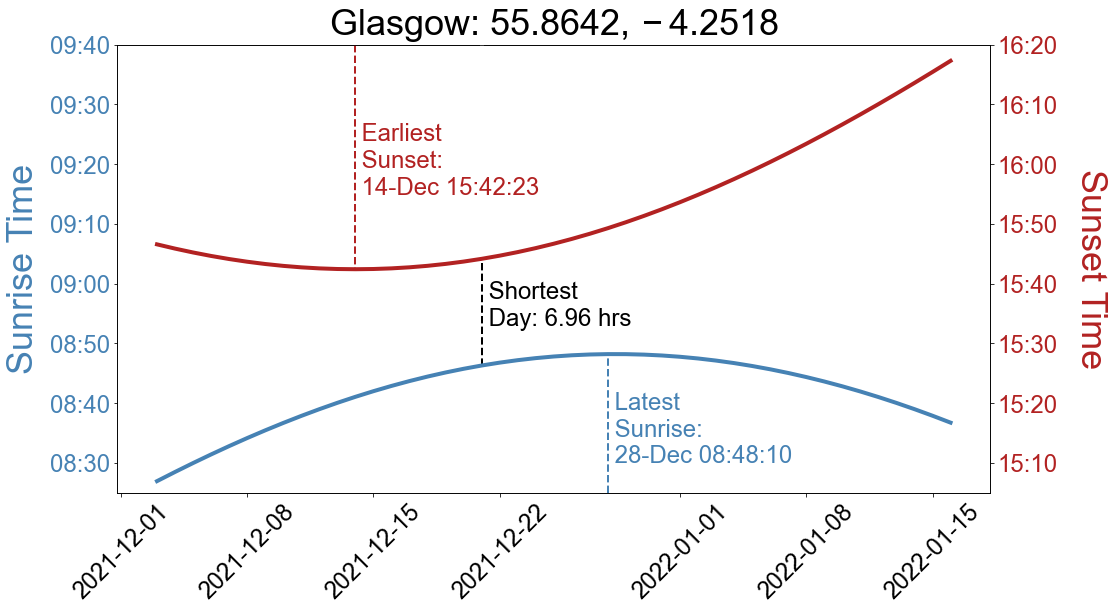

In [10]:
# Now plot them together with different y-axes for sunrise and sunset times

plt.rcParams.update({'font.size': 24,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})
srcl='steelblue'
sscl='firebrick'
fsztit=36

fig,ax = plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('#FFFFFF')
# ax.set_xlabel('Date',fontsize=fsztit)
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%y'))
ax.xaxis.set_major_locator(DayLocator(interval=5))
ax.set_ylabel('Sunrise Time',color=srcl,fontsize=fsztit,labelpad=10)
ax.tick_params(axis='y',labelcolor=srcl)
ax.yaxis.set_major_locator(MinuteLocator(interval=10))
ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
axyr=[datetime.datetime(2021, 12, 1,8,25,0),datetime.datetime(2021, 12, 1,9,40,0)]
ax.set_ylim(axyr)
ax.plot([dates[idsrmax],dates[idsrmax]],[axyr[0],sr[idsrmax]],color=srcl,lw=2,ls='--')
ax.text(dates[idsrmax],datetime.datetime(2021, 12, 1,8,30,0),\
        " Latest \n Sunrise: \n "+dates[idsrmax].strftime("%d-%b")+' '+sr[idsrmax].strftime("%H:%M:%S"),color=srcl)
ax.plot([dates[iddymin],dates[iddymin]],[axyr[0],axyr[1]],color='k',lw=2,ls='--')
ax.plot([dates[iddymin],dates[iddymin]],[axyr[0],sr[iddymin]],color='w',lw=4)
ax.plot(dates, sr,color=srcl,lw=4)



ax2=ax.twinx()
ax2.set_ylabel('Sunset Time',color=sscl,fontsize=fsztit,labelpad=50,rotation=-90)
ax2.tick_params(axis='y',labelcolor=sscl)
ax2.yaxis.set_major_locator(MinuteLocator(interval=10))
ax2.yaxis.set_major_formatter(DateFormatter('%H:%M'))
ax2yr=[datetime.datetime(2021, 12, 1,15,5,0),datetime.datetime(2021, 12, 1,16,20,0)]
ax2.set_ylim(ax2yr)
ax2.plot([dates[idssmin],dates[idssmin]],[ax2yr[1],ss[idssmin]],color=sscl,lw=2,ls='--')
ax2.text(dates[idssmin],datetime.datetime(2021, 12, 1,15,55,0),\
         " Earliest \n Sunset: \n "+dates[idssmin].strftime("%d-%b")+' '+ss[idssmin].strftime("%H:%M:%S"),color=sscl)
ax2.text(dates[iddymin],datetime.datetime(2021, 12, 1,15,33,0),\
         " Shortest \n Day: {0:.2f} hrs".format(dylght_hnum[iddymin]),color='k',rotation=0)

ax2.plot([dates[iddymin],dates[iddymin]],[ss[iddymin],ax2yr[1]],color='w',lw=4)
ax2.plot(dates, ss,color=sscl,lw=4)


plt.title("Glasgow: $55.8642, -4.2518$",pad=10,fontsize=fsztit)
fig.tight_layout()
plt.savefig("gla_sunrise_set_winter.png")
plt.show()
